In [1]:
from collections import Counter
from sklearn.cluster import KMeans
from scipy.spatial import KDTree
from webcolors import hex_to_rgb
import numpy as np
import matplotlib.pyplot as plt
from webcolors import rgb_to_hex
import cv2

COLOURS = {
    "Red": ["#FF0000", '#B22222', '#DC143C', '#800000','#A52A2A',  '#8B0000', '#B71C1C', "#FF6347", "#b6524a", "#d83d1a"],
    "Green": ['#008000', '#00FF00', '#228B22', '#006400', "#32CD32", '#2E8B57', "#c5f7c1", "#394a40"],
    "Blue": ["#0000FF", '#1E90FF', '#4169E1', '#00008B', '#00CED1',"#00FFFF", "#008080", "#87CEEB",  "#ADD8E6", "#c1f4f7","#b8c8cf",
              "#9cb1b2", "#4872a0","#6e87a2"],
    "Yellow": ["#FFFF00", "#D2AB4C","#808000", '#FFD700', '#FFA500', '#FFC300', '#F0E68C', "#F7ecc1", "#F5DEB3", "#D2AB4C","#a89e7d",
               "#e0b550","#d7c669"],
    "Pink": ["#FF00FF", "#C35885", "#D4A8C2","#FFC0CB", "#EE82EE", '#FFC0CB', '#FF69B4', '#FF1493','#FF6EB4', '#FF91A4', "#f5c1f7",
             "#8f5b7e","#c2abb1","#ca9985","#dac0d8","#e1c5ba"],
    "Background": ["#000000"],
    "Black": ['#010101'],
    "White": ['#FFFFFF',"#f1e9e4"],
    "Grey": ['#808080', '#A9A9A9', '#D3D3D3', "#4F4D4A","#403c37", "#333236", "#c4bfb9","#c6c2c0","#bdae9c","#a29c92","#b9aeb4","#e1d2c0",
             "#6c6c6f","#6e6e71"],
    "Purple": ["#800080", "#4B0082", '#9932CC', '#8A2BE2', '#9400D3','#9370DB', '#6A5ACD', '#9932CC', "#c5c1f7","#5e356b","#6d5965"],
    "Orange": ['#fa7600', '#b5510e', '#FF7F50', '#FF4500', '#FF9100', '#FF6E40', '#FF5722',  '#E65100'],
    "Brown": ["#4a2a0a", '#8B4513', '#654321', '#9c6a38', '#423527', '#cc9c6e', "#4e3d31","#ac8171", "#deaa5c", "#dfccb0","#6e6144",
              "#c4a37f", "#bb8f7c","#c16c3f","#5e4045"]
}

def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(8,4))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') 
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

def convert_rgb_to_names(rgb_tuple):
    
    names, rgb_values = zip(*[(color_name, hex_to_rgb(color_hex)) for color_name, x in COLOURS.items() for color_hex in x])
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_)
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)

    perc = dict(sorted(perc.items()))
    colour = [[convert_rgb_to_names(colour.astype(int)), rgb_to_hex(colour.astype(int)), perc[i]] for i,colour in enumerate(k_cluster.cluster_centers_)]
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette, colour

def image_segment(img):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    _,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
    edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

    cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((256,256), np.uint8)
    masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

    dst = cv2.bitwise_and(img, img, mask=mask)
    segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    return segmented

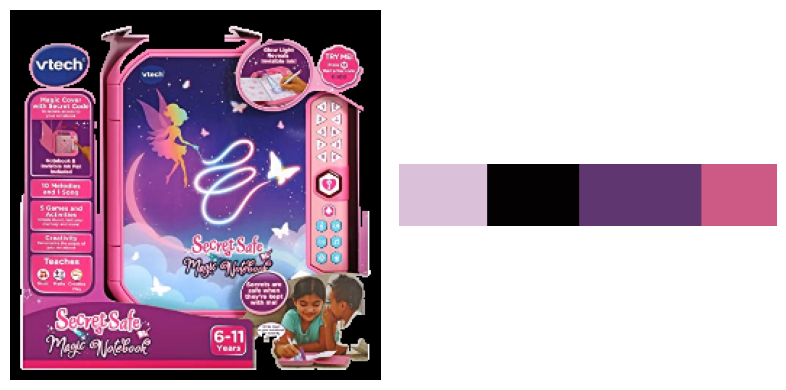

[['Pink', '#dac0d8', 0.23], ['Black', '#040102', 0.24], ['Purple', '#5f366f', 0.32], ['Pink', '#cd5985', 0.21]]


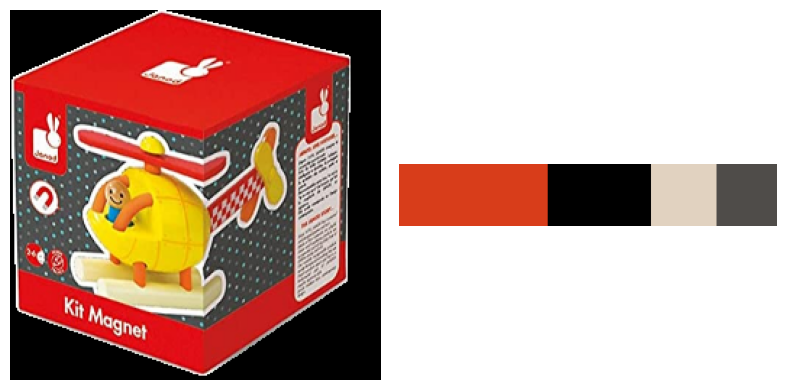

[['Red', '#d83d1a', 0.39], ['Background', '#000000', 0.27], ['Grey', '#e1d2c0', 0.17], ['Grey', '#4f4c49', 0.18]]


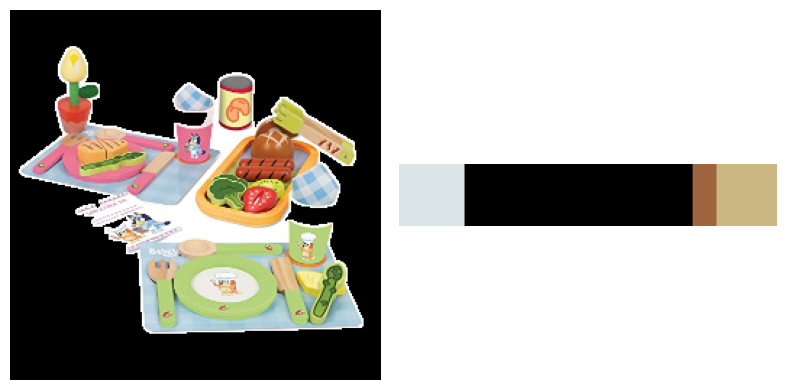

[['White', '#dbe4e7', 0.17], ['Background', '#000000', 0.6], ['Brown', '#9e653e', 0.06], ['Brown', '#cbb783', 0.18]]


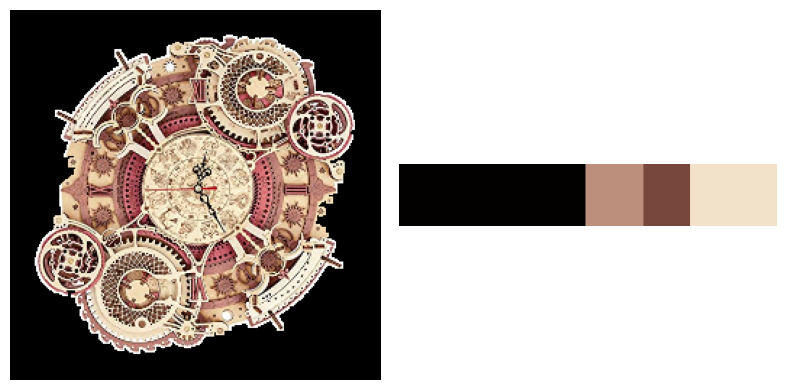

[['Black', '#030100', 0.49], ['Brown', '#bb8f7c', 0.15], ['Brown', '#77473b', 0.12], ['Yellow', '#f1e2c9', 0.24]]


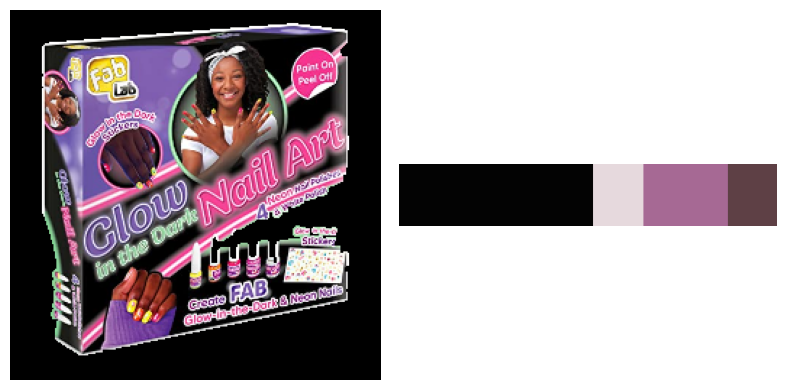

[['Black', '#030303', 0.51], ['White', '#e6d9dd', 0.13], ['Pink', '#a66994', 0.22], ['Brown', '#5e4045', 0.14]]


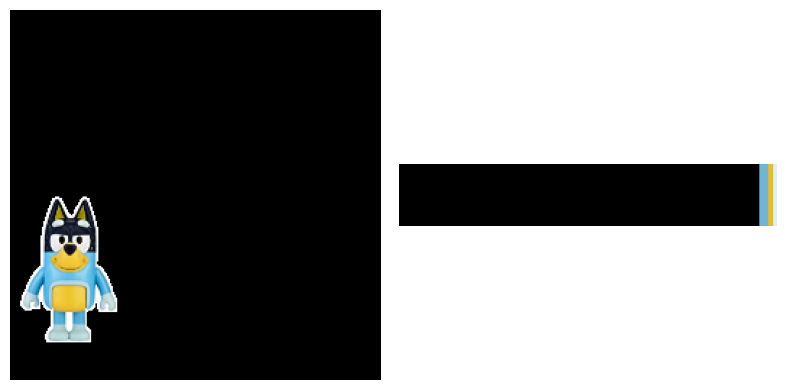

[['Background', '#000000', 0.95], ['Blue', '#72b5d2', 0.02], ['Yellow', '#ddbc3e', 0.01], ['White', '#e3eeee', 0.02]]


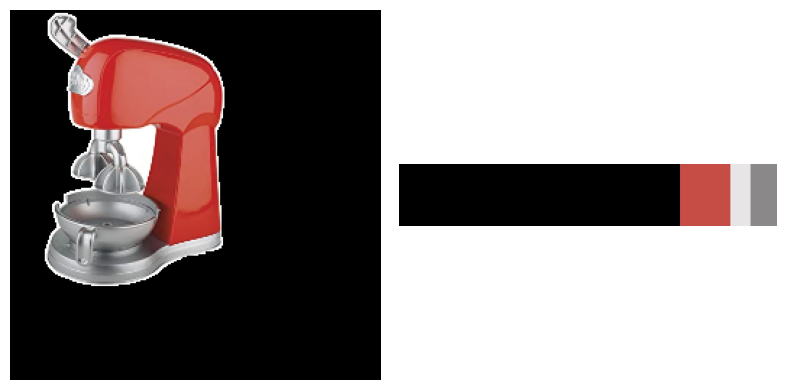

[['Background', '#000000', 0.74], ['Red', '#c54d45', 0.13], ['White', '#e7e5e6', 0.05], ['Grey', '#8a8889', 0.08]]


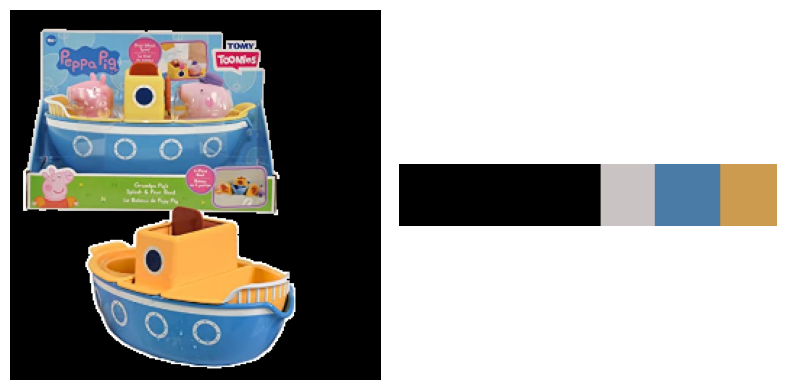

[['Background', '#010000', 0.53], ['Grey', '#c9c3c3', 0.14], ['Blue', '#4a7ba6', 0.17], ['Yellow', '#cc9b4f', 0.16]]


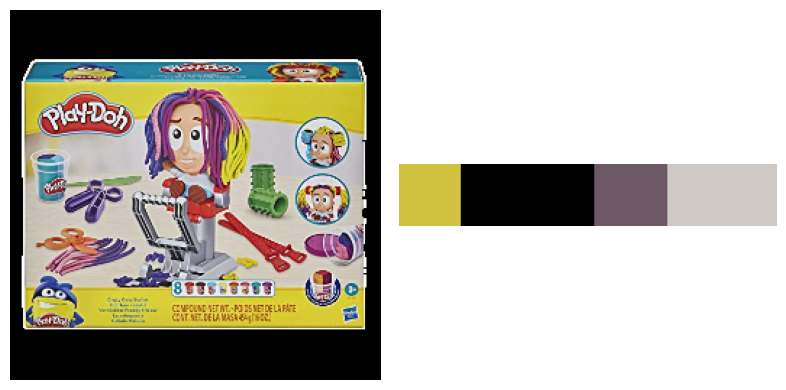

[['Yellow', '#d0c23e', 0.16], ['Black', '#020102', 0.35], ['Purple', '#6d5965', 0.19], ['Grey', '#cec9c5', 0.3]]


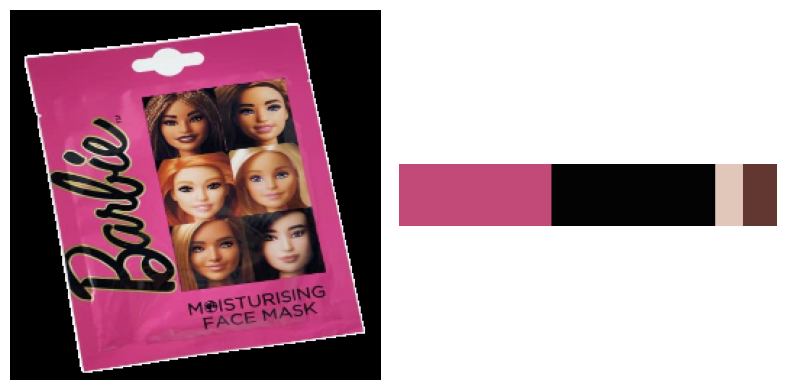

[['Pink', '#c24a78', 0.4], ['Black', '#040304', 0.43], ['Pink', '#e1c6ba', 0.07], ['Brown', '#633731', 0.1]]


In [2]:
import cv2
import os

directory = 'data'
clt = KMeans(n_clusters = 4, n_init=10)

for i,img_path in enumerate(os.listdir(directory)):
    # try:
        img = cv2.imread(f'{directory}/{img_path}')
        img = cv2.resize(img,(256,256))
        img = image_segment(img)

        clt_1 = clt.fit(img.reshape(-1, 3))
        palette, colors = palette_perc(clt_1)
        show_img_compar(img, palette)
        print(colors)

    # except Exception as e:
    #     print(e)